# AI PROJECT_4 SARA TAVAKOLI 810196684

هدف پروژه : در این پروژه میخواهیم با داشتن اطلاعات مربوط به مشتریان یک فروشگاه و تحلیل و پردازش آن ها بررسی کنیم که آیا به فروشکاه برمیگردند یا نه

ابتدا فایل داده ها را می خوانیم که در آن اطلاعات مشتریان در ستون های مختلف آمده است.
به طور مثال کشوری که اهل آن هستند
و چک میکنیم که در آن 
نداشته باشیم و نوع داده ها را نیز چک میکنیمNone
برای اینکه ستون های کتگوریکال را انکد کنیم.

In [1]:
import pandas as pd
import numpy as np
import sklearn

def readData():
    data = pd.read_csv("data.csv")
#     data = data[data['Total Quantity'] > 0]
#     data = data[data['Total Price'] > 0]
#     data = data[data['Purchase Count'] > 0]
    return data

data = readData()
data.head()

,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1
1,1,12552,85,13.52,Italy,2011-10-31,Yes,19
2,2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33
3,3,16934,399,8.30,United Kingdom,2011-10-16,No,62
4,4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16


In [2]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 8 columns):
Unnamed: 0        4366 non-null bool
Customer ID       4366 non-null bool
Total Quantity    4366 non-null bool
Total Price       4366 non-null bool
Country           4366 non-null bool
Date              4366 non-null bool
Is Back           4366 non-null bool
Purchase Count    4366 non-null bool
dtypes: bool(8)
memory usage: 34.2 KB


In [3]:
data.dtypes

Unnamed: 0          int64
Customer ID         int64
Total Quantity      int64
Total Price       float64
Country            object
Date               object
Is Back            object
Purchase Count      int64
dtype: object

ابتدا باید داده هایمان را به داده های قابل پردازش تبدیل کنیم.
برای این کار ابتدا ستون های کتگوریکال را به عدد تبدیل کنیم.
برای این کار استفاده میکنیمPreprocessor  از کلاس
که در آن تاریخ ذخیره شده است به تنهایی به ما اطلاعات مفیدی نمیدهد و باید از آن اطلاعات مفیدی استخراج کنیم Date ستون
به همین دلیل ستون های 
را از آن استخراج میکنیم. زیرا به طور مثال آخر هفته بودن در خرید کردن موثر است Is Weekend, Month, Quarter, Day
یا آخر ماه بودن
بعد از استخراج این داده ها ستون مربوط به تارخ را حذف می کنیم تا ستون کتگوریکال نداشه باشیم



In [4]:
# data['Date'] = pd.to_datetime(data['Date'])
# data.dtypes

def extractDataFromDate(data, columnName):
    data[columnName] = pd.to_datetime(data[columnName])
    data['Day Of Week Name'] = data[columnName].dt.weekday_name
    data['Is Weekend'] = np.where(data['Day Of Week Name'].isin(['Sunday','Saturday']),1,0)
    data['Month'] = data[columnName].dt.month
    data['Day'] = data[columnName].dt.day
    data['Quarter'] = data[columnName].dt.quarter
    return data

In [5]:
data = extractDataFromDate(data, 'Date')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count,Day Of Week Name,Is Weekend,Month,Day,Quarter
0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1,Thursday,0,12,2,4
1,12552,85,13.52,Italy,2011-10-31,Yes,19,Monday,0,10,31,4
2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33,Wednesday,0,5,18,2
3,16934,399,8.30,United Kingdom,2011-10-16,No,62,Sunday,1,10,16,4
4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16,Monday,0,1,17,1


In [6]:
def createDropedData(data):
    droped = pd.DataFrame(columns=['Customer ID', 'Day Of Week Name', 'Date', 'Country'])
    droped['Day Of Week Name'] = data.pop('Day Of Week Name')
    droped['Date'] = data.pop('Date')
    return droped

In [7]:
droped = createDropedData(data)
droped.head()

,Customer ID,Day Of Week Name,Date,Country
0,NaN,Thursday,2010-12-02,NaN
1,NaN,Monday,2011-10-31,NaN
2,NaN,Wednesday,2011-05-18,NaN
3,NaN,Sunday,2011-10-16,NaN
4,NaN,Monday,2011-01-17,NaN


حال میخواهیم ستون مربوط به کشور را از حالت کتگوریکال خارج کنیم و آن را انکد کنیم. برای این کار دو روش وجود دارد
OneHotEncode , LabelEncode
درواقع برای این که بتوانیم این داده ها را به داده های عددی تبدیل کنیم باید داده های این ستون ها را به عد تبدیل کنیم

به ازای هر مقدار موجود در ستون به آن یک عدد نسبت میدهیم. یعنی اگر ۴ داده متفاوت در آن ستون داشتهLabelEncode در روش
باشیم به داده های اعداد یک تا ۴ را نسبت میدهیم


OneHotEncode
در این روش به ازای هر مقدار جدیدی که در ستون موجود باشد یک ستون جدید میسازیم و سطر هایی که در آن ستون آن مقدار را داشته باشند را یک میکنیم و بقیه را صفر

مزیت وان هات این است که به هیچ مقداری اولویت نمیدهد. در روش لیبل انکدینگ ممکن است به یک کشور مقدار ۳ و به کشور دیگری مقدار ۷ را بدهیم و در این صورت انگار که به یکی از آن ها اولویت و مقدار بیشتری دهیم . اما در روش وان هات این اتفاق نمیفتد.

پس از این که انکد کردیم هم ستون کشور را حذف میکنیم.

In [8]:
from sklearn import preprocessing
def applyLabelEncode(data, columnName):
    le = preprocessing.LabelEncoder()
    newColumnName = 'Label Encoded ' + columnName
    labeledData = data.copy()
    labeledData[newColumnName] = le.fit_transform(labeledData[columnName])
    return labeledData

data = applyLabelEncode(data, 'Country')
data.head()

,Customer ID,Total Quantity,Total Price,Country,Is Back,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country
0,16995,-1,-1.25,United Kingdom,No,1,0,12,2,4,35
1,12552,85,13.52,Italy,Yes,19,0,10,31,4,18
2,13192,298,15.90,United Kingdom,Yes,33,0,5,18,2,35
3,16934,399,8.30,United Kingdom,No,62,1,10,16,4,35
4,14976,27,11.90,United Kingdom,Yes,16,0,1,17,1,35


In [9]:
def applyOneHotEncode(data, columnName):
    labeledData = data.copy()
    newColumn = pd.get_dummies(labeledData[columnName], prefix=columnName)
    labeledData = pd.concat([labeledData, newColumn], axis=1)
    return labeledData

# data = applyOneHotEncode(data, 'Country')
# data.head()

In [10]:
goal = data.pop('Is Back')
withCountryData = data.copy()
droped['Country'] = data.pop('Country')
withCountryData.head()

,Customer ID,Total Quantity,Total Price,Country,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country
0,16995,-1,-1.25,United Kingdom,1,0,12,2,4,35
1,12552,85,13.52,Italy,19,0,10,31,4,18
2,13192,298,15.90,United Kingdom,33,0,5,18,2,35
3,16934,399,8.30,United Kingdom,62,1,10,16,4,35
4,14976,27,11.90,United Kingdom,16,0,1,17,1,35


حال میخواهیم 
ای که هر فیچر به ما میدهد را محاسبه کنیم تا ببینیم هر فیچر چقدر ما را در رسیدن به داده هدف کمک میکندgain
به طور مثال اگر فیچر با گین بیشتر را در دخت تصمیم بالاتر قرار دهیم زودتر و در ارتفاع کمتر به جواب میرسیم
برای این کار از 
mutual_info_classif
موجود در کتابخانه 
sklearn.feature_selection
استفاده میکنیم

In [11]:
from sklearn.feature_selection import mutual_info_classif
informationGain = mutual_info_classif(data, goal, discrete_features = True)
informationGain

array([6.23878353e-01, 1.10853862e-01, 1.11499176e-01, 2.19257518e-02,
       2.91739808e-05, 6.91011189e-02, 1.07002469e-02, 1.27215067e-02,
       5.24361691e-03])

Text(0, 0.5, 'Information Gain')

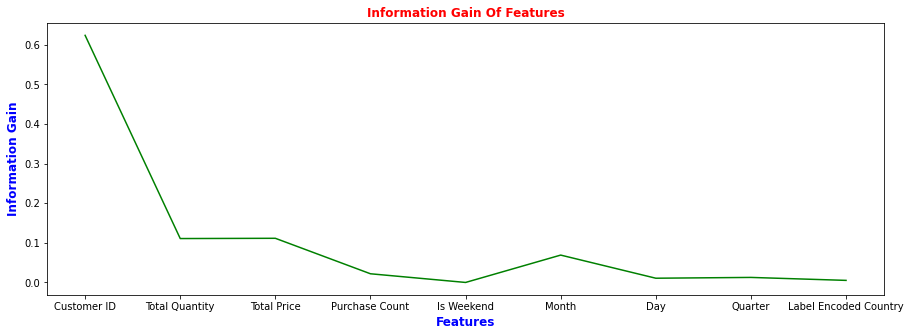

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(data.columns, informationGain, color = 'g')
plt.title('Information Gain Of Features', weight='bold', size='large', color = 'r')
plt.xlabel('Features', weight='bold', size='large', color = 'b')
plt.ylabel('Information Gain', weight='bold', size='large', color = 'b')

همانطور که در نمودار بالا مشاهده میشود
Customer ID 
از همه بیشتر به ما گین میدهد اما این نتیجه گیری درست نیست زیرا این ویژگی برای هر مشتری یکتا است و با تقسیم بندی بر
اساس آن انگار داریم برای هر مشتری برگشتن یا برنگشتن را چک میکنیم و همه ی آن ها با هم تفاوت دارند و باعث اور فیتینگ خالص میشود و هیچ داده جدیده را نمیتواند درست مدل کند (اگر فقط بر اساس همین ویژگی ترین شود)
بنابراین آن را از ستون ها حذف میکنیم و بار دیگر نمودار را میکشیم
از روش لیبل انکد استفاده کردیم زیرا اولویتی بر اساس مقدار ستون ها نداریم و مشکلی ایجاد نمیشود


Text(0, 0.5, 'Information Gain')

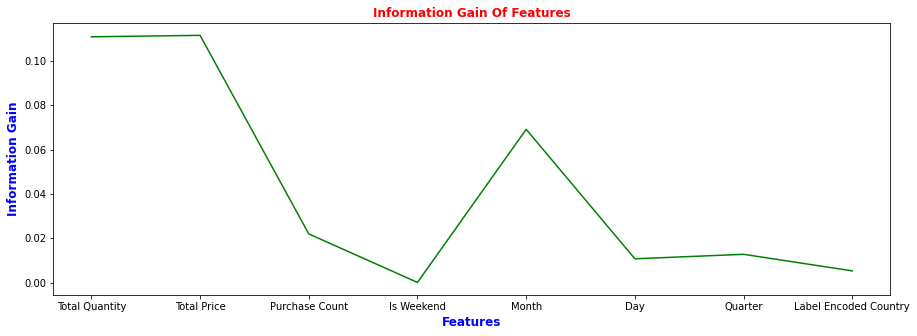

In [13]:
droped['Customer ID'] = data.pop('Customer ID')
informationGain = mutual_info_classif(data, goal, discrete_features = True)

plt.figure(figsize=(15, 5))
plt.plot(data.columns, informationGain, color = 'g')
plt.title('Information Gain Of Features', weight='bold', size='large', color = 'r')
plt.xlabel('Features', weight='bold', size='large', color = 'b')
plt.ylabel('Information Gain', weight='bold', size='large', color = 'b')

حال میخواهیم داده هایمان در یک رنج قرار داشته باشند. زیرا در آینده از روش هایی استفاده میکنیم که به فاصله داده ها از هم بستگی دارندو بنابراین باید از اختلاف زیاد بین آن ها جلوگیری کنیم و آن ها در یک محدوده قرار دهیم.
همچنین بسیاری از الگوریتم ها وقتی اسکیل شوند و فیچر هایشان توزیع نرمال داشته باشند و در یک محدوده باشند عملکرد بهتری دارند و زودتر همگرا میشوند
برای این کار از روش 
استفاده میکنیم standardscale

In [14]:
def scaleDataColumns(data, columns):
    scaler = preprocessing.StandardScaler()
    scaledData = data.copy()
    scaledData[columns] = scaler.fit_transform(scaledData[columns])
    return scaledData

In [15]:
data = applyOneHotEncode(withCountryData, 'Country')
country = data.pop('Country')
cid = data.pop('Customer ID')
data.head()

,Total Quantity,Total Price,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-1,-1.25,1,0,12,2,4,35,0,0,...,0,0,0,0,0,0,0,0,1,0
1,85,13.52,19,0,10,31,4,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2,298,15.90,33,0,5,18,2,35,0,0,...,0,0,0,0,0,0,0,0,1,0
3,399,8.30,62,1,10,16,4,35,0,0,...,0,0,0,0,0,0,0,0,1,0
4,27,11.90,16,0,1,17,1,35,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
data = scaleDataColumns(data, list(data.columns))
data.head()

,Total Quantity,Total Price,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.524359,-0.044660,-0.973192,-0.379645,1.238637,-1.392165,1.099518,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
1,-0.338777,-0.032135,-0.202732,-0.379645,0.739386,2.011013,1.099518,-2.462283,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,-3.065165,-0.030282
2,0.120864,-0.030117,0.396514,-0.379645,-0.508742,0.485450,-0.500647,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
3,0.338815,-0.036562,1.637809,2.634043,0.739386,0.250748,1.099518,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
4,-0.463937,-0.033509,-0.331142,-0.379645,-1.507245,0.368099,-1.300730,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282


In [17]:
from sklearn.model_selection import train_test_split
df = readData()
df = extractDataFromDate(df, 'Date')
df = applyLabelEncode(df, 'Is Back')
df = df.drop(['Unnamed: 0', 'Customer ID', 'Date', 'Day Of Week Name', 'Is Back'], axis = 1)
goal = df.pop('Label Encoded Is Back')
df = applyLabelEncode(df, 'Country')
df = df.drop(['Country'], axis = 1)
df = scaleDataColumns(df, list(df.columns))
df.head()

,Total Quantity,Total Price,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country
0,-0.524359,-0.044660,-0.973192,-0.379645,1.238637,-1.392165,1.099518,0.292425
1,-0.338777,-0.032135,-0.202732,-0.379645,0.739386,2.011013,1.099518,-2.462283
2,0.120864,-0.030117,0.396514,-0.379645,-0.508742,0.485450,-0.500647,0.292425
3,0.338815,-0.036562,1.637809,2.634043,0.739386,0.250748,1.099518,0.292425
4,-0.463937,-0.033509,-0.331142,-0.379645,-1.507245,0.368099,-1.300730,0.292425


حال میخواهیم داده را به دو بخش تست و ترین تقسیم کنیم
و جواب نهایی مربوط به هریک از این دسته ها را نیز جدا میکنیم.
درصد دیفالت این تابع ۷۵ برای ترین و ۲۵ برای تست میباشد

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(df, goal, random_state=42)

ها classifier پیاده سازی
ابتدا از روش 
knn استفاده میکنیم.
ابتدا به ازای اعداد ۱ تا ۱۰۰ این مدل را اجرا میکنیم و جواب آن ها را ذخیره میکنیم و دقت آن ها را محاسبه میکنیم
در انتها دقت به دست آمده در داده های تست و ترین را به ازای هر یک از این اعداد روی نمودار میکشیم  و بعد بیشینه ی دقت در داده های تست را محاسبه میکنیم تا ببینیم به ازای چه تعداد همسایه به دست آمده است.
دقت استفاده شده در این مرحله همان
استaccuracy

در نهایت الگوریتم 
را به ازای بهترین تعداد همسایه ای که یافتیم اجرا میکنیم و اعتبار سنحی میکنیم KNeighborsClassifier

برای پیش پردازش در این الگوریتم داده ها را از ستون تاریخ استخراج کرده و آن ستون را حذف میکنیم. ستون مربوط به آی دی مشتری ها را هم حذف می کنیم و ستون هدف را نیز خارج میکنیم. ستون کشور را هم به روش لیبل انکدینگ انکد میکنیم زیرا مقدار ویژگی ها تاثیر گذار و اولویت دهنده نیستند
ستون کشور را هم خارج میکنیم و چون این الگوریتم مبتنی بر فاصله است تمام داده ها را اسکیل می کنیم
(ابتدا آزمایش کردیم که اگر فقط ستون های مقدار و قیمت و تعداد را اسکیل کنیم بهتر است یا نه اما دقت در حالتی که تمام ستون ها اسکیل شوند بیشتر بود)

  در این الگوریتم در واقع داده را با تعدادی از نزدیک ترین همسایه هایش مقایسه میکنیم و دسته ای که بیشترین تعداد رابین این 
همسایه ها داشته باشد را به عنوان دسته ی این داده تخمین میزنیم

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def knnClassifier(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,101):
        n.append(i)
        neighbors = KNeighborsClassifier(n_neighbors=i)
        neighbors.fit(xTrain, yTrain)
        trainResult = neighbors.predict(xTrain)
        testResult = neighbors.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc


Text(0, 0.5, 'Accuracy')

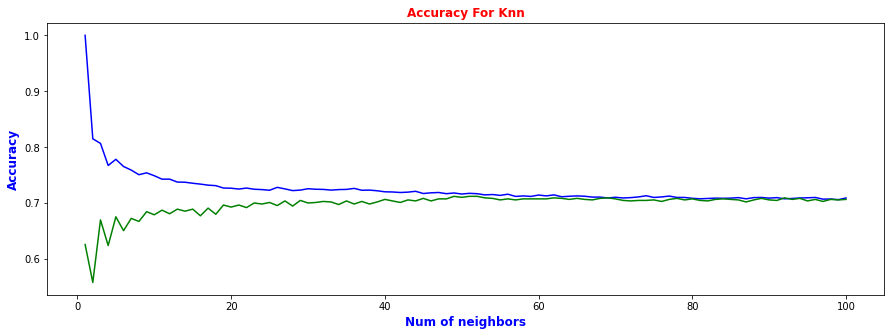

In [20]:
n, trainAcc, testAcc = knnClassifier(xTrain, yTrain, xTest, yTest)

plt.figure(figsize=(15, 5))
plt.plot(n, trainAcc, color = 'b')
plt.plot(n, testAcc, color = 'g')
plt.title('Accuracy For Knn', weight='bold', size='large', color = 'r')
plt.xlabel('Num of neighbors', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

همانطور که دیده میشود با افزایش تعداد همسایه ها دقت مربوط به داده ترین تا جایی کاهش یافته و بعد تقریبا ثابت میشود. دقت مربوط به داده تست هم ابتدا افزایش یافته و از جایی به بعد کمی نوسان میکند و بعد تقریبا ثابت میشود
اگر تعداد همسایه ها را کم انتخاب کنیم (مثلا یک)
اتفاق میفتد زیرا دقت روی داده ترین بسیار زیااد و روی داده تست خیلی کم است overfit
از جایی به بعد هم افزایش تعداد همسایه ها کمکی به افزایش دقت نمیکند

In [21]:
def findMaxAccuracy(testAcc):
    maxAcc = -1
    maxIndex = 0
    for i in range(len(testAcc)):
        if testAcc[i] > maxAcc:
            maxAcc = testAcc[i]
            maxIndex = i + 1
    return maxIndex

In [22]:
bestNumOfNeighbors = findMaxAccuracy(testAcc)
def applyBestKnnClassifier(testAcc, xTrain, yTrain, xTest):
    bKnn = KNeighborsClassifier(n_neighbors=bestNumOfNeighbors)
    bKnn.fit(xTrain, yTrain)
    testResult = bKnn.predict(xTest)
    return testResult

In [23]:
testPredict = applyBestKnnClassifier(testAcc, xTrain, yTrain, xTest)
def calculateValidation(testPredict, yTest):
    validation = {}
    validation["precision"] = metrics.precision_score(yTest, testPredict)
    validation["recall"] = metrics.recall_score(yTest, testPredict)
    validation["accuracy"] = metrics.accuracy_score(yTest, testPredict)
    return validation

In [24]:
validationRes = calculateValidation(testPredict, yTest)
keys = validationRes.keys()
for v in keys:
    print(str(v) + " : " + str(validationRes[v]) )

precision : 0.7221654749744637
recall : 0.9439252336448598
accuracy : 0.7124542124542125


In [25]:
from sklearn.metrics import classification_report
print(classification_report(yTest,testPredict))

              precision    recall  f1-score   support

           0       0.63      0.21      0.31       343
           1       0.72      0.94      0.82       749

    accuracy                           0.71      1092
   macro avg       0.68      0.58      0.56      1092
weighted avg       0.69      0.71      0.66      1092



الگوریتم بعدی درخت تصمیم است
در این الگوریتم نود های میانی همان فیچرا ها هستند که بر اساس آن ها در هر نود تعداد فرزندانی که باید به آن ها تقسیم شود مشخص میشود. یعنی به ازای مقادیر متفاوت هر ویژگی شاخه داریم
و در برگ ها دسته ها مشخص میشوند. و برای هر داده بر اساس ویژگی هایش مسیری در این درخت وجود دارد

ابتدا بین اعداد ۱ تا ۱۰۰ این الگوریتم را اجرا میکنیم تا عمق مناسب را به دست آوریم
برای تمام این اجرا ها دقت به دست آمده را در هر دو دسته ی ترین و تست محاسبه میکنیم و نمودار مربوط به آن را رسم می کنیم

دقت استفاده شده همان 
accuracy است

بعد از به دست آوردن بهترین عمق ( که به ازای بیشترین دقت روی داده تست به دست میاید) الگوریتم را در نهایت برای این مقدار به دست آمده اجرا میکنیم و اعتبار سنجی میکنیم

پیش پردازش مانند روش قبلی است و داریم :
برای پیش پردازش در این الگوریتم داده ها را از ستون تاریخ استخراج کرده و آن ستون را حذف میکنیم. ستون مربوط به آی دی مشتری ها را هم حذف می کنیم و ستون هدف را نیز خارج میکنیم. ستون کشور را هم به روش لیبل انکدینگ انکد میکنیم زیرا مقدار ویژگی ها تاثیر گذار و اولویت دهنده نیستند
ستون کشور را هم خارج میکنیم و چون این الگوریتم مبتنی بر فاصله است تمام داده ها را اسکیل می کنیم
(ابتدا آزمایش کردیم که اگر فقط ستون های مقدار و قیمت و تعداد را اسکیل کنیم بهتر است یا نه اما دقت در حالتی که تمام ستون ها اسکیل شوند بیشتر بود)


In [26]:
from sklearn.tree import DecisionTreeClassifier

def decisionTreeClassifier(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,101):
        n.append(i)
        dtClf = DecisionTreeClassifier(random_state=0, max_depth = i)
        dtClf.fit(xTrain, yTrain)
        trainResult = dtClf.predict(xTrain)
        testResult = dtClf.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc

Text(0, 0.5, 'Accuracy')

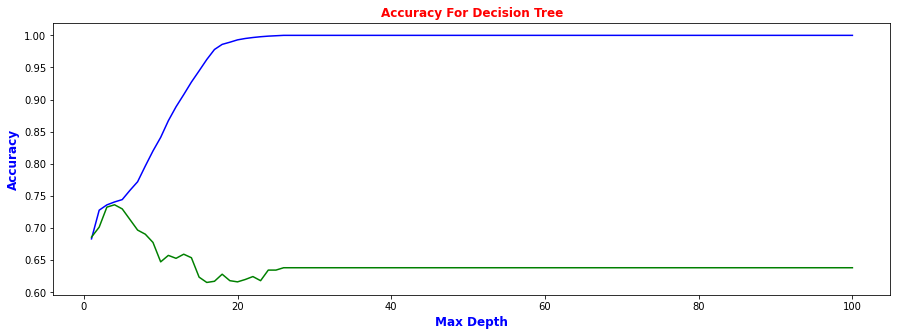

In [27]:
n, trainAcc, testAcc = decisionTreeClassifier(xTrain, yTrain, xTest, yTest)

plt.figure(figsize=(15, 5))
plt.plot(n, trainAcc, color = 'b')
plt.plot(n, testAcc, color = 'g')
plt.title('Accuracy For Decision Tree', weight='bold', size='large', color = 'r')
plt.xlabel('Max Depth', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

همانطور که دیده میشود اگر عمق خیلی کم باشد دقت برای هر دو دسته ی ترین و تست کم است. اگر عمق را خیلی زیاد کنیم دچار اور فیت میشویم. زیرا در این صورت دقیقا بر اساس ویژگی هایی که داده ترین را با آن مدل کرده و آموزش دیده میخواهد تصمیم بگیرد و داده های تست را دقیقا بر همه ی آن ویژگی ها منطبق کند.  که درست نیست  و دقت خوبی روی تست نمیدهد (البته تعداد ویژگی ها هم محدود است در این داده ها).
همانطور که دیده میشود بهترین حالت زمانی است که برای ۳-۴ تا ویژگی عمق را ادامه دهیم

In [28]:

def applyBestDecisionTreeClassifier(testAcc, xTrain, yTrain, xTest):
    bestD = findMaxAccuracy(testAcc)
    print(bestD)
    bDT = DecisionTreeClassifier(random_state=0, max_depth = bestD)
    bDT.fit(xTrain, yTrain)
    testResult = bDT.predict(xTest)
    return testResult

In [29]:
decisionTreeTestRes = applyBestDecisionTreeClassifier(testAcc, xTrain, yTrain, xTest)
validationRes = calculateValidation(decisionTreeTestRes, yTest)
keys = validationRes.keys()
for v in keys:
    print(str(v) + " : " + str(validationRes[v]) )

4
precision : 0.7530186608122942
recall : 0.9158878504672897
accuracy : 0.7362637362637363


In [30]:
print(classification_report(yTest,decisionTreeTestRes))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45       343
           1       0.75      0.92      0.83       749

    accuracy                           0.74      1092
   macro avg       0.70      0.63      0.64      1092
weighted avg       0.72      0.74      0.71      1092



در این الگوریتم با رگرشن دسته ی داده ها را تخمین میزنیم

برای پیش پردازش کرده در این الگوریتم همه موارد مثل الگوریتم های قبلی است به جز ستون کشور.
این ستون را در این الگوریتم با روش وان هات انکد میکنیم زیرا مقدار ستون ها مهم است و نباید برای مقادیری که نسبت به هم اولویتی ندارند تفاوت مقداری قایل شویم

و اعتبارسنجی را برای داده های تست و ترین انجام میدهیم

In [31]:
from sklearn.linear_model import LogisticRegression

df = readData()
df = extractDataFromDate(df, 'Date')
df = applyLabelEncode(df, 'Is Back')
df = df.drop(['Unnamed: 0', 'Customer ID', 'Date', 'Day Of Week Name', 'Is Back'], axis = 1)
goal = df.pop('Label Encoded Is Back')
df = applyLabelEncode(df, 'Country')
df = applyOneHotEncode(df, 'Country')
df = df.drop(['Country'], axis = 1)
df = scaleDataColumns(df, list(df.columns))

In [32]:
xTrain, xTest, yTrain, yTest = train_test_split(df, goal, random_state=41)

In [33]:
def logisticClassifier(xTrain, yTrain, xTest, yTest):
    logisticClf = LogisticRegression(random_state=0)
    logisticClf.fit(xTrain, yTrain)
    trainResult = logisticClf.predict(xTrain)
    testResult = logisticClf.predict(xTest)
    trainAcc = (metrics.accuracy_score(yTrain, trainResult))
    testAcc = (metrics.accuracy_score(yTest, testResult))
    return trainAcc, testAcc, trainResult, testResult
a = logisticClassifier(xTrain, yTrain, xTest, yTest)
print('Train Acc: ', a[0])
print('Test Acc: ', a[1])

Train Acc:  0.7135003054367746
Test Acc:  0.7115384615384616


In [34]:
print('Train Data Validation')
print('precision: ' + str(metrics.precision_score(yTrain, a[2])))
print('recall: ' + str(metrics.recall_score(yTrain, a[2])))
print('accuracy: ' + str(metrics.accuracy_score(yTrain, a[2])))

Train Data Validation
precision: 0.7155809267965078
recall: 0.959045904590459
accuracy: 0.7135003054367746


In [35]:
print(classification_report(yTrain,a[2]))

              precision    recall  f1-score   support

           0       0.69      0.19      0.30      1052
           1       0.72      0.96      0.82      2222

    accuracy                           0.71      3274
   macro avg       0.70      0.58      0.56      3274
weighted avg       0.71      0.71      0.65      3274



In [36]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, a[3])))
print('recall: ' + str(metrics.recall_score(yTest, a[3])))
print('accuracy: ' + str(metrics.accuracy_score(yTest, a[3])))

Test Data Validation
precision: 0.7256281407035176
recall: 0.9450261780104712
accuracy: 0.7115384615384616


In [37]:
print(classification_report(yTest,a[3]))

              precision    recall  f1-score   support

           0       0.57      0.17      0.26       328
           1       0.73      0.95      0.82       764

    accuracy                           0.71      1092
   macro avg       0.65      0.56      0.54      1092
weighted avg       0.68      0.71      0.65      1092



از روش bagging
برای مشاهده ی تاثیر آن بر اورفیت استفاده میکنیم
در این روش واریانس و اورفیت کاهش میابد. در ادامه  توضیح آن را آورده ایم:
The first term introduced, bagging, is shorthand for the combination of bootstrapping and aggregating. Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model.

<img src="b.png">

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
df = readData()
df = extractDataFromDate(df, 'Date')
df = applyLabelEncode(df, 'Is Back')
df = df.drop(['Unnamed: 0', 'Customer ID', 'Date', 'Day Of Week Name', 'Is Back'], axis = 1)
goal = df.pop('Label Encoded Is Back')
df = applyLabelEncode(df, 'Country')
df = df.drop(['Country'], axis = 1)
df = scaleDataColumns(df, list(df.columns))

xTrain, xTest, yTrain, yTest = train_test_split(df, goal, random_state=41)

def knnClassifierWithBagging(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,101):
        n.append(i)
        bgg = BaggingClassifier(KNeighborsClassifier(n_neighbors=i), max_samples=0.5, max_features=0.5)
        bgg.fit(xTrain, yTrain)
        trainResult = bgg.predict(xTrain)
        testResult = bgg.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc


Text(0, 0.5, 'Accuracy')

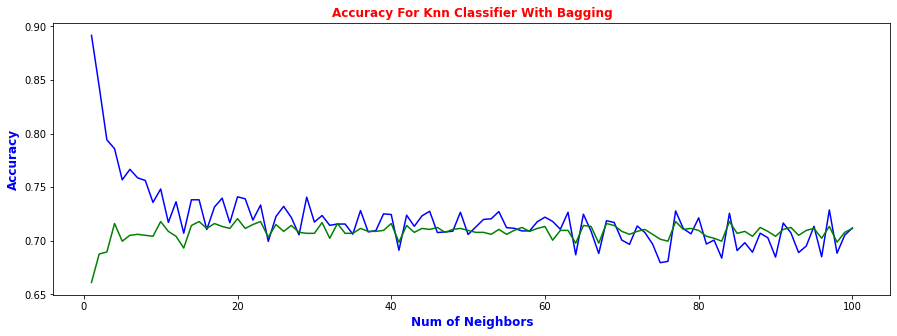

In [39]:
n, trainAcc, testAcc = knnClassifierWithBagging(xTrain, yTrain, xTest, yTest)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(n, trainAcc, color = 'b')
plt.plot(n, testAcc, color = 'g')
plt.title('Accuracy For Knn Classifier With Bagging', weight='bold', size='large', color = 'r')
plt.xlabel('Num of Neighbors', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

In [40]:
def applyBestKnnWithBagging(testAcc, xTrain, yTrain, xTest):
    bestN = findMaxAccuracy(testAcc)
    bgg = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestN), max_samples=0.5, max_features=0.5)
    bgg.fit(xTrain, yTrain)
    testResult = bgg.predict(xTest)
    return testResult

In [41]:
res = applyBestKnnWithBagging(testAcc, xTrain, yTrain, xTest)

In [42]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, res)))
print('recall: ' + str(metrics.recall_score(yTest, res)))
print('accuracy: ' + str(metrics.accuracy_score(yTest, res)))

Test Data Validation
precision: 0.727
recall: 0.9515706806282722
accuracy: 0.7161172161172161


In [43]:
print(classification_report(yTest,res))

              precision    recall  f1-score   support

           0       0.60      0.17      0.26       328
           1       0.73      0.95      0.82       764

    accuracy                           0.72      1092
   macro avg       0.66      0.56      0.54      1092
weighted avg       0.69      0.72      0.66      1092



In [44]:
def decisionTreeWithBagging(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,101):
        n.append(i)
        bgg = BaggingClassifier(DecisionTreeClassifier(random_state=41, max_depth = i), max_samples=0.5, max_features=0.5)
        bgg.fit(xTrain, yTrain)
        trainResult = bgg.predict(xTrain)
        testResult = bgg.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc

Text(0, 0.5, 'Accuracy')

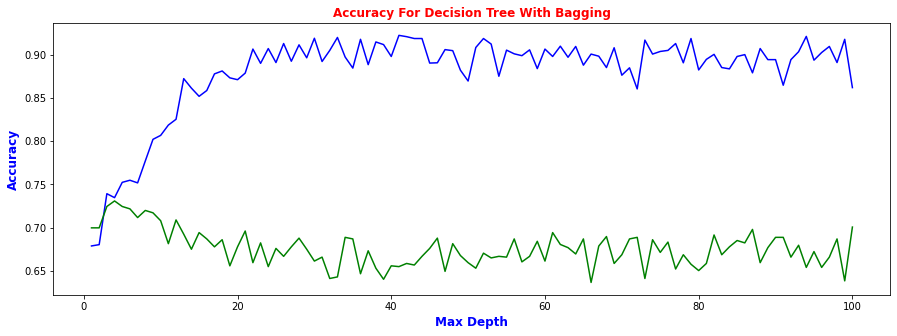

In [45]:
n, trainAcc, testAcc = decisionTreeWithBagging(xTrain, yTrain, xTest, yTest)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(n, trainAcc, color = 'b')
plt.plot(n, testAcc, color = 'g')
plt.title('Accuracy For Decision Tree With Bagging', weight='bold', size='large', color = 'r')
plt.xlabel('Max Depth', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

In [46]:
def applyBestDtWithBagging(testAcc, xTrain, yTrain, xTest):
    bestD = findMaxAccuracy(testAcc)
    bgg = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth = bestD), max_samples=0.5, max_features=0.5)
    bgg.fit(xTrain, yTrain)
    testResult = bgg.predict(xTest)
    return testResult

In [47]:
dtRes = applyBestDtWithBagging(testAcc, xTrain, yTrain, xTest)

In [48]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, dtRes)))
print('recall: ' + str(metrics.recall_score(yTest, dtRes)))
print('accuracy: ' + str(metrics.accuracy_score(yTest, dtRes)))

Test Data Validation
precision: 0.7407797681770284
recall: 0.9201570680628273
accuracy: 0.7188644688644689


In [49]:
print(classification_report(yTest,dtRes))

              precision    recall  f1-score   support

           0       0.57      0.25      0.35       328
           1       0.74      0.92      0.82       764

    accuracy                           0.72      1092
   macro avg       0.66      0.59      0.58      1092
weighted avg       0.69      0.72      0.68      1092



برای مشاهده تاثیر
بر روی اورفیت درخت تصمیم را با عمقی که بیشترین دقت را روی ترین و کمترین دقت را روی تست داشته باشد اجرا میکنیمbagging
و سپس روی آن bagging را اعمال میکنیم



In [50]:
# model with overfit
def applyDecisionTreeWithOverfit(testAcc, xTrain, yTrain, xTest, yTest):
    depth = 22
    bDT = DecisionTreeClassifier(random_state=42, max_depth = depth)
    bDT.fit(xTrain, yTrain)
    trainResult = bDT.predict(xTrain)
    testResult = bDT.predict(xTest)
    return trainResult, testResult
    

In [51]:
ofRes = applyDecisionTreeWithOverfit(testAcc, xTrain, yTrain, xTest, yTest)
print('Train Data Validation')
print('precision: ' + str(metrics.precision_score(yTrain, ofRes[0])))
print('recall: ' + str(metrics.recall_score(yTrain, ofRes[0])))
print('accuracy: ' + str(metrics.accuracy_score(yTrain, ofRes[0])))

Train Data Validation
precision: 0.9995440036479708
recall: 0.9864986498649865
accuracy: 0.9905314599877826


In [52]:
print(classification_report(yTrain,ofRes[0]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1052
           1       1.00      0.99      0.99      2222

    accuracy                           0.99      3274
   macro avg       0.99      0.99      0.99      3274
weighted avg       0.99      0.99      0.99      3274



In [53]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, ofRes[1])))
print('recall: ' + str(metrics.recall_score(yTest, ofRes[1])))
print('accuracy: ' + str(metrics.accuracy_score(yTest, ofRes[1])))

Test Data Validation
precision: 0.7367688022284122
recall: 0.6924083769633508
accuracy: 0.6117216117216118


In [54]:
print(classification_report(yTest,ofRes[1]))

              precision    recall  f1-score   support

           0       0.37      0.42      0.40       328
           1       0.74      0.69      0.71       764

    accuracy                           0.61      1092
   macro avg       0.55      0.56      0.55      1092
weighted avg       0.63      0.61      0.62      1092



In [55]:
def applyOverFittedDtWithBagging(testAcc, xTrain, yTrain, xTest):
    bestD = 22
    bgg = BaggingClassifier(DecisionTreeClassifier(random_state=0, max_depth = bestD), max_samples=0.5, max_features=0.5)
    bgg.fit(xTrain, yTrain)
    testResult = bgg.predict(xTest)
    return testResult

In [56]:
dtBgRes = applyOverFittedDtWithBagging(testAcc, xTrain, yTrain, xTest)

In [57]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, dtBgRes)))
print('recall: ' + str(metrics.recall_score(yTest, dtBgRes)))
print('accuracy: ' + str(metrics.accuracy_score(yTest, dtBgRes)))

Test Data Validation
precision: 0.7338618346545867
recall: 0.8481675392670157
accuracy: 0.6785714285714286


In [58]:
print(classification_report(yTest,dtBgRes))

              precision    recall  f1-score   support

           0       0.44      0.28      0.35       328
           1       0.73      0.85      0.79       764

    accuracy                           0.68      1092
   macro avg       0.59      0.57      0.57      1092
weighted avg       0.65      0.68      0.65      1092



در ادامه رندم فارست یا جنگل تصادفی را روی داده ها اجرا میکنیم
ابتدا پارامتر عمق و سپس پارامتر تعداد درخت ها را بر اساس بیشترین دقتی که به ما میدهند پیدا میکنیم
یعنی بین اعداد ۱ تا ۱۰۰ برای عمق به ازای همه رندم فارست را اجرا کرده و عمقی که بیشترین دقت را داشته باشد میابیم
برای تعداد درختان هم همین کار را با اعداد بین ۱ تا ۲۰۰ انجام میدهیم
و در نهایت اعتبار سنجی میکنیم


Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Advantages:

    Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
    It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
    The algorithm can be used in both classification and regression problems.
    Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
    You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

Disadvantages:

    Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
    The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

source :https://www.datacamp.com/community/tutorials/random-forests-classifier-python

<img src="f.png">

In [59]:
from sklearn.ensemble import RandomForestClassifier

def findDepthParametr(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,101):
        n.append(i)
        rf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
        rf.fit(xTrain, yTrain)
        trainResult = rf.predict(xTrain)
        testResult = rf.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc

In [60]:
randomForestD = findDepthParametr(xTrain, yTrain, xTest, yTest)

Text(0, 0.5, 'Accuracy')

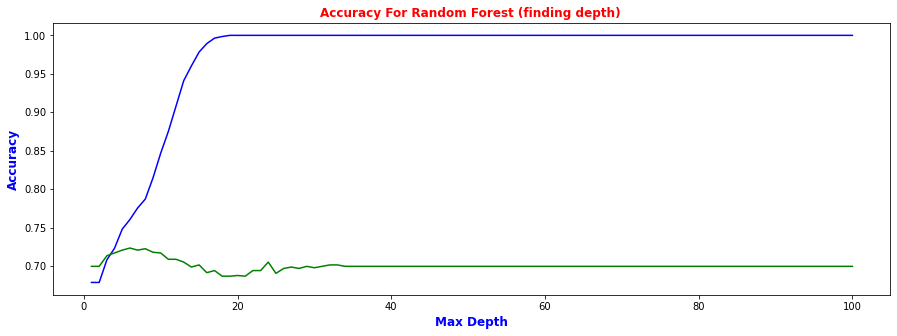

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(randomForestD[0], randomForestD[1], color = 'b')
plt.plot(randomForestD[0], randomForestD[2], color = 'g')
plt.title('Accuracy For Random Forest (finding depth) ', weight='bold', size='large', color = 'r')
plt.xlabel('Max Depth', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

In [62]:
bestD = findMaxAccuracy(randomForestD[2])
bestD

6

In [63]:
def findNParametr(xTrain, yTrain, xTest, yTest):
    trainAcc = []
    testAcc = []
    n = []
    for i in range(1,201):
        n.append(i)
        rf = RandomForestClassifier(n_estimators=i, max_depth=None, random_state=42)
        rf.fit(xTrain, yTrain)
        trainResult = rf.predict(xTrain)
        testResult = rf.predict(xTest)
        trainAcc.append(metrics.accuracy_score(yTrain, trainResult))
        testAcc.append(metrics.accuracy_score(yTest, testResult))
    return n, trainAcc, testAcc

In [64]:
randomForestN = findNParametr(xTrain, yTrain, xTest, yTest)

Text(0, 0.5, 'Accuracy')

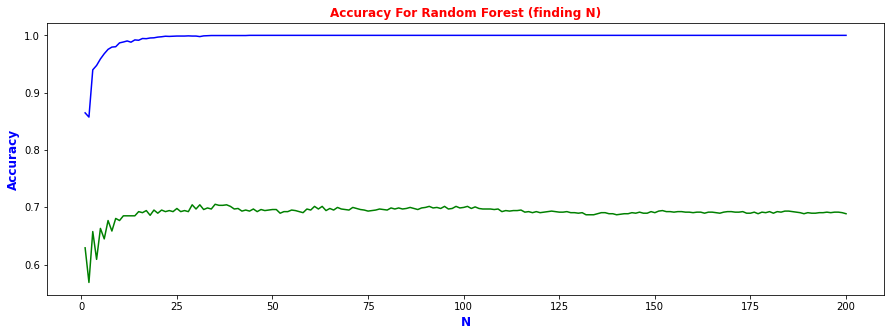

In [65]:
plt.figure(figsize=(15, 5))
plt.plot(randomForestN[0], randomForestN[1], color = 'b')
plt.plot(randomForestN[0], randomForestN[2], color = 'g')
plt.title('Accuracy For Random Forest (finding N)', weight='bold', size='large', color = 'r')
plt.xlabel('N', weight='bold', size='large', color = 'b')
plt.ylabel('Accuracy', weight='bold', size='large', color = 'b')

In [66]:
bestN = findMaxAccuracy(randomForestN[2])
bestN

35

In [67]:
def findNParametr(xTrain, yTrain, xTest, yTest, n, d):
    rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
    rf.fit(xTrain, yTrain)
    trainResult = rf.predict(xTrain)
    testResult = rf.predict(xTest)
#     trainAcc = (metrics.accuracy_score(yTrain, trainResult))
#     testAcc = (metrics.accuracy_score(yTest, testResult))
    return trainResult, testResult

In [68]:
randomForestRes = findNParametr(xTrain, yTrain, xTest, yTest, bestN, bestD)

In [69]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, randomForestRes[1])))
print('recall: ' + str(metrics.recall_score(yTest, randomForestRes[1])))
print('accuracy: ' + str(metrics.accuracy_score(yTest, randomForestRes[1])))

Test Data Validation
precision: 0.7491961414790996
recall: 0.9149214659685864
accuracy: 0.7261904761904762


In [70]:
print(classification_report(yTest,randomForestRes[1]))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39       328
           1       0.75      0.91      0.82       764

    accuracy                           0.73      1092
   macro avg       0.67      0.60      0.60      1092
weighted avg       0.70      0.73      0.69      1092



In [71]:
print('Train Data Validation')
print('precision: ' + str(metrics.precision_score(yTrain, randomForestRes[0])))
print('recall: ' + str(metrics.recall_score(yTrain, randomForestRes[0])))
print('accuracy: ' + str(metrics.accuracy_score(yTrain, randomForestRes[0])))

Train Data Validation
precision: 0.761611030478955
recall: 0.9446444644464447
accuracy: 0.7617593158216249


In [72]:
print(classification_report(yTrain,randomForestRes[0]))

              precision    recall  f1-score   support

           0       0.76      0.38      0.50      1052
           1       0.76      0.94      0.84      2222

    accuracy                           0.76      3274
   macro avg       0.76      0.66      0.67      3274
weighted avg       0.76      0.76      0.73      3274



همان طور که مشاهده می شود شاهد افزایش دقت درخت تصمیم با این روش هستیم
(همان طور که انتظار میرفت)

bootstraping :
Bootstrapping is a method to help decrease the variance of the classifier and reduce overfitting, by resampling data from the training set with the same cardinality as the original set. The model created should be less overfitted than a single individual model.
source : https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

و الگوریتم bagging: bagging (Bootstrap Aggregating)
است.

پس واریانس و اورفیت و بایاس را کاهش میدهد
در واقع سمپل های متعدد میسازد (با جایگذاری) و شاید دقت را روی ترین کاهش دهد اما دقت روی تست افزایش میابد

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

بهینه شده ی 
knn, decision tree, logistic regression
را به آن میدهیم

In [73]:
from sklearn.ensemble import VotingClassifier

df = readData()
df = extractDataFromDate(df, 'Date')
df = applyLabelEncode(df, 'Is Back')
df = df.drop(['Unnamed: 0', 'Customer ID', 'Date', 'Day Of Week Name', 'Is Back'], axis = 1)
goal = df.pop('Label Encoded Is Back')
df = applyLabelEncode(df, 'Country')
df = applyOneHotEncode(df, 'Country')
df = df.drop(['Country'], axis = 1)
df = scaleDataColumns(df, list(df.columns))
df.head()

,Total Quantity,Total Price,Purchase Count,Is Weekend,Month,Day,Quarter,Label Encoded Country,Country_Australia,Country_Austria,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,-0.524359,-0.044660,-0.973192,-0.379645,1.238637,-1.392165,1.099518,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
1,-0.338777,-0.032135,-0.202732,-0.379645,0.739386,2.011013,1.099518,-2.462283,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,-3.065165,-0.030282
2,0.120864,-0.030117,0.396514,-0.379645,-0.508742,0.485450,-0.500647,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
3,0.338815,-0.036562,1.637809,2.634043,0.739386,0.250748,1.099518,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282
4,-0.463937,-0.033509,-0.331142,-0.379645,-1.507245,0.368099,-1.300730,0.292425,-0.045449,-0.045449,...,-0.015136,-0.015136,-0.015136,-0.081772,-0.042845,-0.066112,-0.030282,-0.021408,0.326247,-0.030282


In [74]:
xTrain, xTest, yTrain, yTest = train_test_split(df, goal, random_state=42)

In [75]:
bestDepth = 4
knn = KNeighborsClassifier(n_neighbors=bestNumOfNeighbors)
dt = DecisionTreeClassifier(random_state=0, max_depth = bestDepth)
lr = LogisticRegression(random_state=0)

hardVotingClf = VotingClassifier(estimators=[('kn', knn), ('dt', dt), ('lr', lr)], voting='hard')
hardVotingClf.fit(xTrain, yTrain)
trainResult = hardVotingClf.predict(xTrain)
testResult = hardVotingClf.predict(xTest)

In [76]:
print('Test Data Validation')
print('precision: ' + str(metrics.precision_score(yTest, testResult)))
print('recall: ' + str(metrics.recall_score(yTest, testResult)))
print('accuracy: ' + str(metrics.accuracy_score(yTest, testResult)))

Test Data Validation
precision: 0.7207207207207207
recall: 0.9612817089452603
accuracy: 0.717948717948718


In [77]:
print(classification_report(yTest,testResult))

              precision    recall  f1-score   support

           0       0.69      0.19      0.29       343
           1       0.72      0.96      0.82       749

    accuracy                           0.72      1092
   macro avg       0.70      0.57      0.56      1092
weighted avg       0.71      0.72      0.66      1092



In [78]:
print('Train Data Validation')
print('precision: ' + str(metrics.precision_score(yTrain, trainResult)))
print('recall: ' + str(metrics.recall_score(yTrain, trainResult)))
print('accuracy: ' + str(metrics.accuracy_score(yTrain, trainResult)))

Train Data Validation
precision: 0.7231903485254692
recall: 0.9646848457755923
accuracy: 0.7235797189981674


In [79]:
print(classification_report(yTrain,trainResult))

              precision    recall  f1-score   support

           0       0.73      0.20      0.32      1037
           1       0.72      0.96      0.83      2237

    accuracy                           0.72      3274
   macro avg       0.73      0.58      0.57      3274
weighted avg       0.72      0.72      0.67      3274



حال میخواهیم تشابه
knn, decision tree, logistic regression
را محاسبه کنیم

In [80]:
knn.fit(xTrain, yTrain)
knnResult = knn.predict(xTest)

dt.fit(xTrain, yTrain)
dtResult = dt.predict(xTest)

lr.fit(xTrain, yTrain)
lrResult = lr.predict(xTest)

knnAndDt = 0
knnAndLr = 0
dtAndLr = 0

for i in range(len(knnResult)):
    if knnResult[i] == dtResult[i]:
        knnAndDt += 1
    if knnResult[i] == lrResult[i]:
        knnAndLr += 1
    if dtResult[i] == lrResult[i]:
        dtAndLr += 1
        
print("knn and dt: " + str(knnAndDt/len(knnResult)) + ' knn and lr: ' + str(knnAndLr/len(knnResult)) + ' dt and lr: ' + str(dtAndLr/len(knnResult)))

knn and dt: 0.8873626373626373 knn and lr: 0.9313186813186813 dt and lr: 0.8791208791208791


همان طور که مشاهده میشود درصد تشابه این سه مدل به یکدیگر زیاد است و به همین دلیل اجرای 
hard-vote
روی آن ها نتیجه ی خیلی بهتر و متفاوتی به ما نمیدهد.
(زیرا این الگوریتم ها پاسخ های مشابهی دارند اکثرا و به همین دلیل ترکیب آن ها نیز مدل جدیدی به ما نمیدهد.(